In [1]:
import numpy as np 
import pandas as pd        
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [2]:
import nltk
from nltk.corpus import stopwords
from textblob import Word
from textblob import TextBlob
# Libraries for visualization:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
from plotly.subplots import make_subplots

In [7]:
# Load Data
from google.colab import drive
drive.mount('/content/gdrive')
name_of_file='reviewsVK.csv'
path = '/content/gdrive/MyDrive/Colab Notebooks/'+ name_of_file

spotify=pd.read_csv(path,usecols=["Review","Rating"])
data=spotify.copy()
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Review,Rating
0,Не могу понять где моя музыка который ВКонтакт...,3
1,Топ,5
2,"Сделайте так, чтобы можно было посмотреть музы...",4
3,Не работает без интернета. Вранье.,1
4,Качество звука очень нравится! Да и пользовать...,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2000 non-null   object
 1   Rating  2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [9]:
fig=px.histogram(data,x="Rating")
fig.show()

In [10]:
# Check for missing values:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

Replaced the number values by text values

In [11]:
data["Rating"].replace(1, value="negative",inplace=True)
data["Rating"].replace(2, value="negative",inplace=True)
data["Rating"].replace(3, value="neutral",inplace=True)
data["Rating"].replace(4, value="positive",inplace=True)
data["Rating"].replace(5, value="positive",inplace=True)
data.head()

,Review,Rating
0,Не могу понять где моя музыка который ВКонтакт...,neutral
1,Топ,positive
2,"Сделайте так, чтобы можно было посмотреть музы...",positive
3,Не работает без интернета. Вранье.,negative
4,Качество звука очень нравится! Да и пользовать...,positive


In [12]:
fig=px.histogram(data,x="Rating")
fig.show()

Removing URLs and Punctuation

In [13]:
import re
data["Review"]=data["Review"].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x))
data.head(2)
data["Review"]=data["Review"].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))

#lower case
data["Review"]=data["Review"].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head(2)

#Removing numbers
data["Review"]=data["Review"].str.replace("\d","")
data["Review"]=data["Review"].apply(lambda x: " ".join(x.split()))


In [14]:
import nltk
from nltk.corpus import stopwords
sw=stopwords.words("english")
data["Review"]=data["Review"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
data.head()

,Review,Rating
0,,neutral
1,,positive
2,,positive
3,,negative
4,,positive


In [15]:
from textblob import Word
nltk.download("wordnet")
data["Review"]=data["Review"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Review,Rating
0,,neutral
1,,positive
2,,positive
3,,negative
4,,positive


Rating
negative     715
neutral      175
positive    1110
dtype: int64


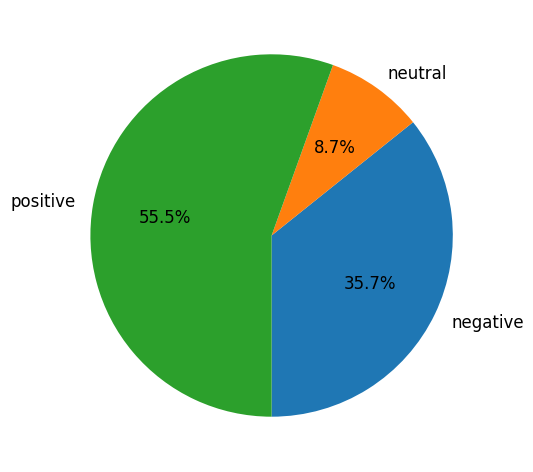

In [16]:
# number of reviews by sentiments
sentiment_counts = data.groupby(['Rating']).size()
print(sentiment_counts)

# visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

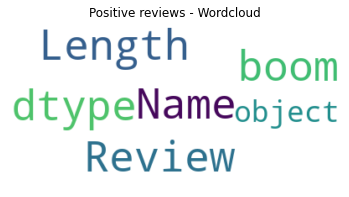

In [17]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive reviews
positive_reviews = data['Review'][data["Rating"] == 'positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_reviews))
plt.figure()
plt.title("Positive reviews - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

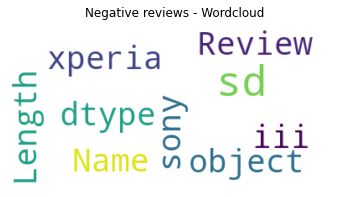

In [18]:
# Wordcloud with negative reviews
negative__reviews = data['Review'][data["Rating"] == 'negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative__reviews))
plt.figure()
plt.title("Negative reviews - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Calculating NPS**

In [19]:
conditions = [
    (data['Rating']  == 'negative'),
    (data['Rating']  == 'neutral'),
    (data['Rating']  == 'positive')
]

values = ['Detractor', 'Passive', 'Promoter']

data['NPS_category'] = np.select(conditions, values)
print(data.head())

  Review    Rating NPS_category
0          neutral      Passive
1         positive     Promoter
2         positive     Promoter
3         negative    Detractor
4         positive     Promoter


In [20]:
totalreviews = len(data)
totalPromoters = len(data[data['NPS_category'] == 'Promoter'])
totalDetractors = len(data[data['NPS_category'] == 'Detractor'])

nps = (totalPromoters/totalreviews - totalDetractors/totalreviews)*100
print('The NPS is ' , nps)

The NPS is  19.750000000000007
